In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
model = tf.keras.models.load_model('../models/18126401_1/checkpoints')
model

In [3]:
for d, a,b  in os.walk('../test_data'):
    files = filter(lambda f: f.endswith('g'), b) # jpg
    filenames = np.array(list(files))
    paths = np.array([os.path.join(d, f) for f in filenames])
    labels = np.array([f[0] for f in filenames])
labels = pd.Series(labels)
labels.values

array(['F', 'G', 'L', 'M', 'R', 'S', 'A', 'X', 'Y', 'A', 'A', 'B', 'U',
       'T', 'B', 'A', 'K', 'J', 'Z', 'B', 'Q', 'P', 'O', 'N', 'E', 'D',
       'H', 'I', 'B', 'C', 'V', 'W'], dtype=object)

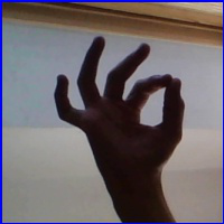

In [4]:
from IPython.display import Image 
imgs = [tf.keras.preprocessing.image.load_img(
    path, grayscale=False, color_mode='rgb', target_size=(224, 224),
    interpolation='bilinear'
) for path in paths]
display(imgs[0])

In [5]:
imarrs = np.array([tf.keras.preprocessing.image.img_to_array(img) for img in imgs])
imarrs.shape

(32, 224, 224, 3)

(array([612716., 446425., 418140., 477875., 644903., 540292., 849931.,
        697278.,  79224.,  50112.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ], dtype=float32),
 <BarContainer object of 10 artists>)

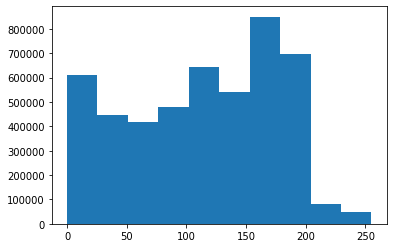

In [6]:
plt.hist(imarrs.flatten())

In [7]:
x = tf.convert_to_tensor(imarrs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x.shape

TensorShape([32, 224, 224, 3])

(array([612716., 446425., 418140., 477875., 644903., 540292., 849931.,
        697278.,  79224.,  50112.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

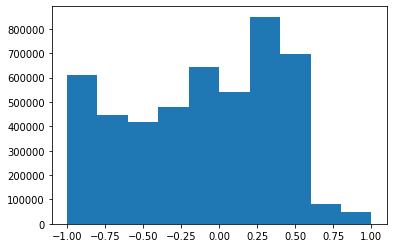

In [8]:
plt.hist(x.numpy().flatten())

A random batch

In [9]:
x1 = tf.random.uniform((32, 224, 224, 3))
model.predict(x1)[0]

array([0.01250166, 0.00511738, 0.00436802, 0.00561308, 0.00528358,
       0.00588255, 0.00626489, 0.0056796 , 0.0115502 , 0.00998733,
       0.00954615, 0.0124735 , 0.01271423, 0.02305567, 0.01378736,
       0.02067077, 0.02606281, 0.01996342, 0.02698288, 0.02642332,
       0.03483811, 0.0691902 , 0.09513883, 0.5322987 , 0.00250635,
       0.00209955], dtype=float32)

Input images

In [10]:
predictions = model.predict(x)
predictions[0]

array([0.01250165, 0.00511738, 0.00436801, 0.00561308, 0.00528356,
       0.00588254, 0.00626488, 0.00567961, 0.01155023, 0.00998732,
       0.00954618, 0.01247352, 0.01271423, 0.02305569, 0.01378736,
       0.0206708 , 0.02606275, 0.01996336, 0.02698289, 0.02642326,
       0.03483805, 0.06919003, 0.09513891, 0.53229886, 0.00250635,
       0.00209955], dtype=float32)

In [11]:
np.sum(predictions[0])

1.0000001

In [12]:
intlabels_p = np.argmax(predictions, axis=1)
intlabels_p

array([23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23])

In [13]:
intlabels, class_names = pd.factorize(labels.sort_values())
intlabels

array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [14]:
sum(intlabels_p == intlabels), 'out of', len(x)

(1, 'out of', 32)